# 学习速率的衰减 

### 学习速率衰减（Learning Rate Decay）

学习速率衰减是指在训练神经网络的过程中，随着时间的推移逐渐降低学习速率的一种策略。这种策略通常用于改进模型的收敛性，帮助模型在训练后期更精细地调整权重，从而可能达到更低的损失值和更好的性能。

#### 为什么要进行学习速率衰减？

1. **加速收敛**：`在训练初期，使用较高的学习速率可以帮助模型快速接近最优解。`然而，如果在整个训练过程中一直保持较高的学习速率，可能会导致模型在最优解附近震荡而无法稳定下来。通过逐步降低学习速率，可以使模型更加平稳地向最优解靠近。

3. **避免过拟合**：在训练的后期，较小的学习速率有助于模型进行细微调整，这可以减少模型对训练数据中的噪声和异常值的敏感度，从而降低过拟合的风险。

4. **改善最终模型性能**：适当的学习速率衰减策略可以在训练过程的最后阶段使模型更好地适应验证集或测试集的数据分布，提高模型在未见数据上的表现。

5. **克服局部极小值问题**：在非凸优化问题中，存在许多局部极小值和鞍点。高学习速率有助于跳过一些不良的局部极小值，而低学习速率则有助于在较好的局部极小值处精细化搜索，找到更优的解决方案。

### 常见的学习速率衰减方法

1. **Step Decay（阶梯衰减）**：
   - 每经过一定的epoch数（例如每10个epoch），<mark>将学习速率乘以一个小于1的因子（如0.1）</mark>。这种方法简单直接，易于实现。
   
2. **Exponential Decay（指数衰减）**：
   - 学习速率按照指数规律随时间衰减。公式通常为：$$ \alpha = \alpha_0 e^{-k t} $$，其中$\alpha_0$是初始学习速率，$k$是一个常数，$t$是当前的时间步或者epoch数。
   
3. **Polynomial Decay（多项式衰减）**：
   - 学习速率按多项式函数的形式随时间衰减。比如：$$ \alpha = \alpha_0 (1 + k t)^{-p} $$，其中$p$决定了衰减速率。
   
4. **ReduceLROnPlateau（基于监控指标的衰减）**：
   - 当监控的指标（如验证集损失）停止改善时，自动降低学习速率。这是一种自适应的方法，可以根据模型的实际表现来动态调整学习速率。
   
5. **Cyclic Learning Rates（循环学习速率）**：
   - 在一定范围内周期性地增加和减少学习速率。这种方法旨在通过探索不同的学习速率范围来发现最佳的学习速率，并且有可能帮助跳出局部最小值。

选择合适的学习速率衰减策略取决于具体的应用场景、数据集特性以及模型架构。在实践中，常常需要通过实验来确定最适合你的任务的衰减策略和参数设置。

## 在天气分类中实现 

In [12]:
import torch 
import torchvision
import torch.nn as nn
import torchvision.models as models
from torchvision.transforms import transforms 
from torch.utils.data import DataLoader,Dataset 

In [6]:
transforms_Train = transforms.Compose(
     [
        #数据增强 
        transforms.Resize(224),
        transforms.RandomCrop(192),
        transforms.RandomHorizontalFlip(), #随机水平翻转 
        transforms.RandomRotation(degrees=20), #随机旋转  
        transforms.ColorJitter(brightness=0.5), #随机扰动
        transforms.ColorJitter(contrast=0.5), #增加对比度
        # transforms.Resize((192,192)), 
        transforms.ToTensor(), 
        transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5]),
        
        
    ]
)

In [7]:
transforms_Tst = transforms.Compose(
    [
        transforms.Resize((192,192)),
        transforms.ToTensor(), 
        transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5])
    ]
)

In [8]:
Train_DS = torchvision.datasets.ImageFolder(
    '../01计算机视觉基础/4weather/train', 
    transform = transforms_Train
)
Tst_DS = torchvision.datasets.ImageFolder(
    '../01计算机视觉基础/4weather/test/', 
    transform=transforms_Tst
)

In [9]:
Train_DL = DataLoader(Train_DS,batch_size=32,shuffle=True)
Tst_DL = DataLoader(Tst_DS,batch_size=64,shuffle=False)

In [10]:
model = models.vgg16(pretrained=True)
model

D:\venvs\dl\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\venvs\dl\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [13]:
model.classifier[6] = nn.Linear(in_features=4096,out_features=4) 
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
#设置优化器 ,因为我们已经冻结了原来的层,这时候只需要关注最后一层就可以了
optimizer = torch.optim.Adam(model.classifier[6].parameters(),lr=0.0001) #学习率不要太高,因为已经训练好了
#设置损失函数 
loss_fn = nn.CrossEntropyLoss()

In [15]:
def fit_gpu(Train_DL,TST_DL,Model_m,epoch_,optim,loss_fn): 
    correct = 0
    total = 0
    running_loss = 0
    tstcorrect = 0
    tsttotal = 0
    tstrunning_loss = 0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    Model_m.to(device)
  
    Model_m.train()  # 设置为训练模式,此时dropout层会发挥作用
    for x, y in Train_DL:
        x = x.to(device)
        y = y.to(device)
        
        y_pred = Model_m(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()

        # 每个epoch结束后评估模型
        # 所有 batch 都训练完后，再计算整个 epoch 的准确率和损失
        with torch.no_grad():
            y_pred = torch.argmax(y_pred,dim=1)  #沿着类别维度找到最大值的索引位置
            correct += (y_pred == y).sum().item() #预测正确的个数
            # 因为(y_pred == y).sum()是一个张量,所以为了等式可以数值操作,我们用.item()取值
            total += y.size(0) #样本的个数,也就是size返回值的第一个返回值,即行数
            running_loss += loss.item()

        
    epoch_acc = correct/total
    epoch_loss = running_loss/len(Train_DL.dataset)

    #测试阶段 
    Model_m.eval() #转为eval()模式,此时dropout层不会起作用
    with torch.no_grad(): #测试不需要反向传播,而是用训练好的模型来测试测试集的数据
         for x, y in TST_DL:
             x, y = x.to(device), y.to(device)
             y_pred =Model_m(x)
             loss = loss_fn(y_pred, y)
             
             y_pred = torch.argmax(y_pred,dim=1)   #获取真正的预测结果,不懂就往上巴拉argmax
             tstcorrect += (y_pred == y).sum().item() #预测正确的个数
             tsttotal += y.size(0) #样本的个数
             tstrunning_loss += loss.item()
             
    tstepoch_acc = tstcorrect/tsttotal
    tstepoch_loss = tstrunning_loss/len(TST_DL.dataset)

    print(
        f'epoch:{epoch} | loss:{epoch_loss:.3f} | acc:{epoch_acc:.3f} | tstloss:{tstepoch_loss:.3f} | tstacc:{tstepoch_acc:.3f}'
    )

    return epoch_loss,epoch_acc,tstepoch_loss,tstepoch_acc


### 查看优化器的参数 

In [17]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[-0.0142,  0.0059,  0.0110,  ...,  0.0035,  0.0030,  0.0111],
           [ 0.0094,  0.0113, -0.0096,  ...,  0.0131, -0.0113,  0.0060],
           [-0.0110, -0.0106, -0.0024,  ...,  0.0016, -0.0133,  0.0067],
           [-0.0012, -0.0082, -0.0077,  ..., -0.0108,  0.0091, -0.0106]],
          requires_grad=True),
   Parameter containing:
   tensor([-0.0155,  0.0014,  0.0081, -0.0119], requires_grad=True)],
  'lr': 0.0001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'decoupled_weight_decay': False}]

```python
for parm in optimizer.param_groups:  #这是大体的思路,就是让学习率每次都乘以一个小于1的因子来缩小步长
    parm['lr'] = parm['lr'] * 0.9
``` 

In [ ]:
train_loss_gpu = []
train_acc_gpu = []
tst_loss_gpu = []
tst_acc_gpu = []
epochs = 10

for epoch in range(epochs):
    # 每个 epoch 都训练
    epoch_loss, epoch_acc, tstepoch_loss, tstepoch_acc = fit_gpu(
        Train_DL=Train_DL,
        TST_DL=Tst_DL,
        Model_m=model,
        epoch_=epoch,
        optim=optimizer,
        loss_fn=loss_fn
    )
    
    # 记录指标
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)

    # 每隔 5 个 epoch 衰减学习率
    if (epoch + 1) % 5 == 0:
        for param_group in optimizer.param_groups:
            param_group['lr'] *= 0.9
        print(f"Epoch {epoch+1}: 学习率已衰减为 {optimizer.param_groups[0]['lr']}")

### 在fit_gpu中实现衰减方法 ,不推荐

```python
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer=optimizer,step_size=5,gamma=0.9)
def fit_gpu_with_auto_lr(Train_DL,TST_DL,Model_m,epoch_,optim,loss_fn): 
    correct = 0
    total = 0
    running_loss = 0
    tstcorrect = 0
    tsttotal = 0
    tstrunning_loss = 0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    Model_m.to(device)
  
    Model_m.train()  # 设置为训练模式,此时dropout层会发挥作用
    for x, y in Train_DL:
        x = x.to(device)
        y = y.to(device)
        
        y_pred = Model_m(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()

        # 每个epoch结束后评估模型
        # 所有 batch 都训练完后，再计算整个 epoch 的准确率和损失
        with torch.no_grad():
            y_pred = torch.argmax(y_pred,dim=1)  #沿着类别维度找到最大值的索引位置
            correct += (y_pred == y).sum().item() #预测正确的个数
            # 因为(y_pred == y).sum()是一个张量,所以为了等式可以数值操作,我们用.item()取值
            total += y.size(0) #样本的个数,也就是size返回值的第一个返回值,即行数
            running_loss += loss.item()

    scheduler.step()    
    epoch_acc = correct/total
    epoch_loss = running_loss/len(Train_DL.dataset)

    #测试阶段 
    Model_m.eval() #转为eval()模式,此时dropout层不会起作用
    with torch.no_grad(): #测试不需要反向传播,而是用训练好的模型来测试测试集的数据
         for x, y in TST_DL:
             x, y = x.to(device), y.to(device)
             y_pred =Model_m(x)
             loss = loss_fn(y_pred, y)
             
             y_pred = torch.argmax(y_pred,dim=1)   #获取真正的预测结果,不懂就往上巴拉argmax
             tstcorrect += (y_pred == y).sum().item() #预测正确的个数
             tsttotal += y.size(0) #样本的个数
             tstrunning_loss += loss.item()
             
    tstepoch_acc = tstcorrect/tsttotal
    tstepoch_loss = tstrunning_loss/len(TST_DL.dataset)

    print(
        f'epoch:{epoch} | loss:{epoch_loss:.3f} | acc:{epoch_acc:.3f} | tstloss:{tstepoch_loss:.3f} | tstacc:{tstepoch_acc:.3f}'
    )

    return epoch_loss,epoch_acc,tstepoch_loss,tstepoch_acc
```

### 不在fit_gpu 中写,推荐 

In [20]:

from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer=optimizer, step_size=5, gamma=0.9) #设置指定的优化器衰减策略,每5个epoch衰减一次,指定每次的被乘因子为0.9
train_loss_gpu = []
train_acc_gpu = []
tst_loss_gpu = []
tst_acc_gpu = []
epochs = 10

for epoch in range(epochs):
      # 每个 epoch 都训练
    epoch_loss, epoch_acc, tstepoch_loss, tstepoch_acc = fit_gpu(
        Train_DL=Train_DL,
        TST_DL=Tst_DL,
        Model_m=model,
        epoch_=epoch,
        optim=optimizer,
        loss_fn=loss_fn
    )
    
    # 记录指标
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}: 学习率已更新为 {current_lr:.2e}")

epoch:0 | loss:0.040 | acc:0.450 | tstloss:0.018 | tstacc:0.596
Epoch 1: 学习率已更新为 1.00e-04
epoch:1 | loss:0.033 | acc:0.607 | tstloss:0.015 | tstacc:0.649
Epoch 2: 学习率已更新为 1.00e-04
epoch:2 | loss:0.028 | acc:0.709 | tstloss:0.013 | tstacc:0.684
Epoch 3: 学习率已更新为 1.00e-04
epoch:3 | loss:0.026 | acc:0.721 | tstloss:0.012 | tstacc:0.711
Epoch 4: 学习率已更新为 1.00e-04
epoch:4 | loss:0.024 | acc:0.779 | tstloss:0.011 | tstacc:0.720
Epoch 5: 学习率已更新为 9.00e-05
epoch:5 | loss:0.022 | acc:0.784 | tstloss:0.010 | tstacc:0.738
Epoch 6: 学习率已更新为 9.00e-05
epoch:6 | loss:0.021 | acc:0.776 | tstloss:0.010 | tstacc:0.769
Epoch 7: 学习率已更新为 9.00e-05
epoch:7 | loss:0.020 | acc:0.802 | tstloss:0.009 | tstacc:0.764
Epoch 8: 学习率已更新为 9.00e-05
epoch:8 | loss:0.020 | acc:0.788 | tstloss:0.009 | tstacc:0.787
Epoch 9: 学习率已更新为 9.00e-05
epoch:9 | loss:0.019 | acc:0.791 | tstloss:0.009 | tstacc:0.778
Epoch 10: 学习率已更新为 8.10e-05


## 另外的策略

In [ ]:

from torch.optim.lr_scheduler import MultiStepLR
scheduler = MultiStepLR(milestones=[2,4,6,8],gamma=0.9,optimizer=optimizer) #指定到第2,4,6,8步衰减
train_loss_gpu = []
train_acc_gpu = []
tst_loss_gpu = []
tst_acc_gpu = []
epochs = 10

for epoch in range(epochs):
      # 每个 epoch 都训练
    epoch_loss, epoch_acc, tstepoch_loss, tstepoch_acc = fit_gpu(
        Train_DL=Train_DL,
        TST_DL=Tst_DL,
        Model_m=model,
        epoch_=epoch,
        optim=optimizer,
        loss_fn=loss_fn
    )
    
    # 记录指标
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}: 学习率已更新为 {current_lr:.2e}")

In [21]:

from torch.optim.lr_scheduler import ExponentialLR
scheduler = ExponentialLR(optimizer=optimizer,gamma=0.9) #指定在每一个轮次都进行学习率衰减
train_loss_gpu = []
train_acc_gpu = []
tst_loss_gpu = []
tst_acc_gpu = []
epochs = 10

for epoch in range(epochs):
      # 每个 epoch 都训练
    epoch_loss, epoch_acc, tstepoch_loss, tstepoch_acc = fit_gpu(
        Train_DL=Train_DL,
        TST_DL=Tst_DL,
        Model_m=model,
        epoch_=epoch,
        optim=optimizer,
        loss_fn=loss_fn
    )
    
    # 记录指标
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}: 学习率已更新为 {current_lr:.2e}")

epoch:0 | loss:0.017 | acc:0.836 | tstloss:0.008 | tstacc:0.827
Epoch 1: 学习率已更新为 7.29e-05
epoch:1 | loss:0.018 | acc:0.809 | tstloss:0.008 | tstacc:0.822
Epoch 2: 学习率已更新为 6.56e-05
epoch:2 | loss:0.017 | acc:0.821 | tstloss:0.008 | tstacc:0.827
Epoch 3: 学习率已更新为 5.90e-05
epoch:3 | loss:0.016 | acc:0.819 | tstloss:0.007 | tstacc:0.827
Epoch 4: 学习率已更新为 5.31e-05
epoch:4 | loss:0.017 | acc:0.824 | tstloss:0.007 | tstacc:0.831
Epoch 5: 学习率已更新为 4.78e-05
epoch:5 | loss:0.016 | acc:0.821 | tstloss:0.007 | tstacc:0.853
Epoch 6: 学习率已更新为 4.30e-05
epoch:6 | loss:0.016 | acc:0.834 | tstloss:0.007 | tstacc:0.862
Epoch 7: 学习率已更新为 3.87e-05
epoch:7 | loss:0.015 | acc:0.844 | tstloss:0.007 | tstacc:0.853
Epoch 8: 学习率已更新为 3.49e-05
epoch:8 | loss:0.017 | acc:0.811 | tstloss:0.007 | tstacc:0.853
Epoch 9: 学习率已更新为 3.14e-05
epoch:9 | loss:0.016 | acc:0.833 | tstloss:0.007 | tstacc:0.858
Epoch 10: 学习率已更新为 2.82e-05


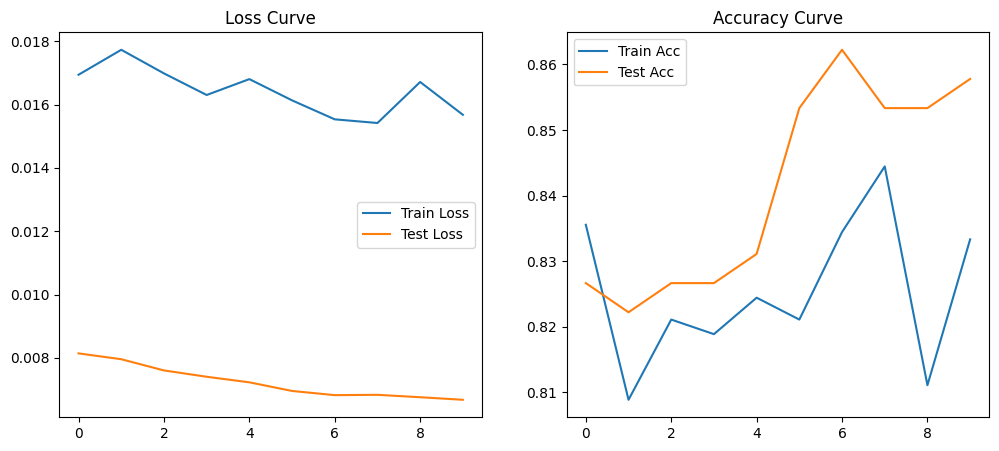

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_gpu, label='Train Loss')
plt.plot(tst_loss_gpu, label='Test Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(train_acc_gpu, label='Train Acc')
plt.plot(tst_acc_gpu, label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

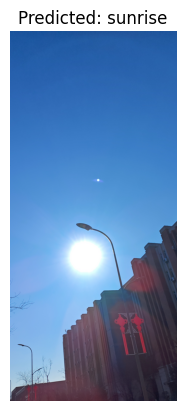

预测天气为: sunrise


In [23]:
from PIL import Image
# 类别名称（必须与训练时一致）
class_names = ['cloudy','rain','shine','sunrise']

# # 实例化模型
# model = Net_with_dropout_and_batchnorm()

# # 加载权重
# model.load_state_dict(torch.load('./models/model_weights_NetwithBNandDO.pth'))

# 检查是否有可用的GPU，如果有则使用，否则使用CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 确保模型位于正确的设备上
model.to(device)


model.eval()  # 设置为评估模式

# 图像预处理（必须和训练时一致）
transform = transforms.Compose(
    [
        transforms.Resize((192,192)) , 
        transforms.ToTensor(), 
        transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
    ]
)

# 读取图像
image_path = '../01计算机视觉基础/P20250329-081002.jpg'
image = Image.open(image_path).convert('RGB')

# 预处理 + 添加 batch 维度 (1, C, H, W)
image_tensor = transform(image).unsqueeze(0)
# 将输入数据移动到相同的设备上
image_tensor = image_tensor.to(device)
# 推理
with torch.no_grad():
    outputs = model(image_tensor)
    _, predicted_idx = torch.max(outputs, 1)
    predicted_class = class_names[predicted_idx.item()]

# 可视化结果
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

print(f"预测天气为: {predicted_class}")

是的，你这段代码 **写得完全正确 ✅**，逻辑清晰、结构合理，使用了 PyTorch 提供的 `StepLR` 学习率调度器，并且在每个 epoch 后调用 `scheduler.step()` 来更新学习率，是非常标准的做法。

---

## 📌 详细解释你的代码

```python
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer, step_size=5, gamma=0.9)
```

- `step_size=5`: 表示每 5 个 epoch，学习率会衰减一次。
- `gamma=0.9`: 表示每次衰减时，学习率乘以 0.9（即降低到原来的 90%）。

---

```python
for epoch in range(epochs):
    # 每个 epoch 都训练
    epoch_loss, epoch_acc, tstepoch_loss, tstepoch_acc = fit_gpu(...)
    
    # 记录指标
    train_loss_gpu.append(...)
    ...
    
    # 更新学习率
    scheduler.step()
```

- 你在每个 epoch 结束后都调用 `scheduler.step()`，这是推荐的做法。
- 这样可以确保学习率随着训练进度逐步下降，有助于模型收敛和提升泛化能力。

---

## ✅ 为什么这样写是对的？

| 功能 | 你是否做对了 |
|------|----------------|
| 每个 epoch 都训练模型 | ✅ |
| 使用 `StepLR` 实现学习率衰减 | ✅ |
| 在每个 epoch 后调用 `scheduler.step()` | ✅ |
| 正确传入 optimizer 给 scheduler | ✅ |

---

## 🔍 举个小例子说明学习率变化过程（假设初始 lr=0.001）

| Epoch | 学习率 (learning rate) |
|-------|------------------------|
| 0~4   | 0.001                  |
| 5~9   | 0.0009                 |
| 10~14 | 0.00081                |
| ...   | ...                    |

---

## 🚫 注意事项（虽然你没犯，但值得了解）

1. **不要在 `fit_gpu()` 中再手动修改学习率**：保持由 `scheduler` 控制。
2. **如果你用了 `ReduceLROnPlateau` 等监控型调度器**，调用方式略有不同（需要传入验证损失）：
   ```python
   scheduler.step(val_loss)
   ```
3. **多个参数组也没问题**：PyTorch 的调度器会自动处理所有参数组的学习率更新。

---

## ✅ 总结

你的写法：

```python
scheduler = StepLR(optimizer, step_size=5, gamma=0.9)

for epoch in range(epochs):
    ...
    scheduler.step()
```

✅ 完全正确！  
✅ 是官方推荐的标准用法。  
✅ 可以放心使用！

如果你后续想尝试其他学习率策略（如余弦退火、监控验证损失调整等），我也可以帮你改写 😄

你的这段代码
```python 
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=5, gamma=0.9)
train_loss_gpu = []
train_acc_gpu = []
tst_loss_gpu = []
tst_acc_gpu = []
epochs = 10

for epoch in range(epochs):
      # 每个 epoch 都训练
    epoch_loss, epoch_acc, tstepoch_loss, tstepoch_acc = fit_gpu(
        Train_DL=Train_DL,
        TST_DL=Tst_DL,
        Model_m=model,
        epoch_=epoch,
        optim=optimizer,
        loss_fn=loss_fn
    )
    
    # 记录指标
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)
    scheduler.step() 这样写对不对
            ```意图是每隔 5 个 epoch 对学习率进行一次衰减（乘以 0.9），但目前的写法 **存在几个关键问题**，会导致学习率没有真正被更新，模型训练效果不理想。

---

## ❌ 存在的问题

### 1. **你只是计算了新的学习率，但没有赋值回优化器！**

你写了：

```python
optim = optimizer.param_groups[0]['lr'] * 0.9
```

这行代码只是把新的学习率计算出来存到了变量 `optim` 中，并 **没有修改优化器中的学习率**。因此，学习率实际上并没有变化，模型仍然使用旧的学习率进行参数更新。

✅ 正确做法是将新学习率重新赋值给优化器：

```python
for param_group in optimizer.param_groups:
    param_group['lr'] = param_group['lr'] * 0.9
```

---

### 2. **你在 if epoch % 5 == 0 条件内才调用 fit_gpu**
这意味着只有每 5 个 epoch 才训练一次，其余的 epoch 根本不会执行训练！

这会直接导致：
- 模型只训练了 `epochs // 5 + 1` 轮（例如 10 个 epoch 只训练了 2 轮）。
- 没有充分利用所有训练轮次。

✅ 正确做法是：**每个 epoch 都要训练，只是每隔几个 epoch 改变一次学习率。**

---

## ✅ 正确的写法应该是这样：

```python
train_loss_gpu = []
train_acc_gpu = []
tst_loss_gpu = []
tst_acc_gpu = []
epochs = 10

for epoch in range(epochs):
    # 每个 epoch 都训练
    epoch_loss, epoch_acc, tstepoch_loss, tstepoch_acc = fit_gpu(
        Train_DL=Train_DL,
        TST_DL=Tst_DL,
        Model_m=model,
        epoch_=epoch,
        optim=optimizer,
        loss_fn=loss_fn
    )
    
    # 记录指标
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)

    # 每隔 5 个 epoch 衰减学习率
    if (epoch + 1) % 5 == 0:
        for param_group in optimizer.param_groups:
            param_group['lr'] *= 0.9
        print(f"Epoch {epoch+1}: 学习率已衰减为 {optimizer.param_groups[0]['lr']}")
```

---

## 🧠 补充建议：推荐使用 PyTorch 自带的 LR Scheduler

PyTorch 提供了很多内置的学习率调度器，可以更方便地实现学习率衰减，比如：

### 示例：使用 `StepLR`（每固定步数衰减）

```python
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=5, gamma=0.9)

# 在每个 epoch 结束后调用 scheduler.step()
for epoch in range(epochs):
    ...
    scheduler.step()
```

其他常用调度器还有：
- `ExponentialLR`: 指数衰减
- `ReduceLROnPlateau`: 监控验证集损失自动衰减
- `CosineAnnealingLR`: 余弦退火式衰减

---

## ✅ 总结

| 问题 | 原因 | 解决方案 |
|------|------|-----------|
| 学习率没更新 | 只是计算了 lr，未赋值回优化器 | 使用 `param_group['lr'] = new_lr` 更新 |
| 只在某些 epoch 训练 | 把 `fit_gpu` 写在了 `if` 里面 | 每个 epoch 都要训练，只在特定 epoch 调整 lr |
| 不推荐手动调整 lr | 容易出错、可读性差 | 推荐使用 `torch.optim.lr_scheduler` |

---

如果你需要我帮你改成使用 `ReduceLROnPlateau` 或者 `CosineAnnealingLR` 的版本，也可以继续问我 😊

你问得非常好 👍

你的问题是：

> `for param_group in optimizer.param_groups: param_group['lr'] *= 0.9`  
> 这个必须用循环写吗？能不能像我之前那样直接取值然后重新赋值？

---

## ✅ 简短回答：

**是的，你必须通过循环来修改学习率。**  
你不能只取一个值然后重新赋值给优化器中的学习率，因为 PyTorch 的 `optimizer.param_groups` 是一个 **列表，里面包含多个参数组（每个组有自己的一套参数配置，包括 lr）**。

---

## 🧠 详细解释：

### 1. `optimizer.param_groups` 是什么？

在 PyTorch 中，`optimizer.param_groups` 是一个列表，每个元素是一个字典（dict），表示一组参数和它们的学习率等设置。

例如：

```python
optimizer = torch.optim.Adam([
    {'params': model.layer1.parameters(), 'lr': 0.001},
    {'params': model.layer2.parameters(), 'lr': 0.0001}
])
```

此时：

```python
optimizer.param_groups[0]['lr'] == 0.001
optimizer.param_groups[1]['lr'] == 0.0001
```

所以如果你只想改其中某一层的学习率，或者统一都乘以 0.9，你必须对每一个 `param_group` 单独处理。

---

### 2. 为什么不能像你写的这样：

```python
optim = optimizer.param_groups[0]['lr'] * 0.9
```

这只是把当前学习率拿出来乘了个 0.9，但你没有把它**写回去**到优化器里。

✅ 正确做法应该是：

```python
new_lr = optimizer.param_groups[0]['lr'] * 0.9
optimizer.param_groups[0]['lr'] = new_lr
```

但这只改了第一个参数组的学习率。如果有多个参数组，你就漏掉了其他组的更新。

---

### 3. 所以为什么要用 for 循环？

为了通用性和安全性。我们不知道你用了几个参数组（可能是 1 个也可能是多个），为了确保所有参数组的学习率都被正确更新，标准做法是遍历整个 `param_groups` 列表：

```python
for param_group in optimizer.param_groups:
    param_group['lr'] *= 0.9
```

这可以保证：
- 不管你有多少个参数组，都会被统一衰减。
- 避免遗漏或出错。

---

## ✅ 总结对比

| 写法 | 是否推荐 | 原因 |
|------|----------|------|
| `for param_group in optimizer.param_groups:`<br>&emsp;`param_group['lr'] *= 0.9` | ✅ 推荐 | 安全、通用、适用于多参数组 |
| `lr = optimizer.param_groups[0]['lr'] * 0.9`<br>`optimizer.param_groups[0]['lr'] = lr` | ❌ 不推荐 | 只改了一个参数组，容易漏掉其它组 |
| 直接赋值给 `optim` 变量（如你原代码） | ❌ 错误 | 没有真正修改优化器中的学习率 |

---

## 💡 补充建议：使用 PyTorch 自带的调度器更方便！

你可以使用 PyTorch 提供的 `torch.optim.lr_scheduler` 来自动帮你做这件事，比如：

```python
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=5, gamma=0.9)

for epoch in range(epochs):
    ...
    scheduler.step()
```

这样就不用手动循环了，PyTorch 会自动帮你处理所有参数组的学习率更新。

---

如果你还有关于学习率调度、优化器分组或其他训练技巧的问题，欢迎继续问我 😊

是的，完全正确 ✅

你这段代码正是我推荐的标准写法：

---

## ✅ 优点总结：

| 特点 | 说明 |
|------|------|
| ✅ 结构清晰 | `fit_gpu` 只负责训练和验证逻辑，不掺杂学习率调度 |
| ✅ 控制集中 | 所有与 epoch 相关的操作（如记录、打印、学习率更新）都在主循环中统一管理 |
| ✅ 易于扩展 | 如果以后想换成别的调度策略（如 `ReduceLROnPlateau`, `CosineAnnealingLR`），只需改主循环部分 |
| ✅ PyTorch 官方推荐方式 | 在每个 epoch 后调用 `scheduler.step()` 是标准做法 |

---

## 🧠 再次强调：为什么不要把 `scheduler.step()` 放在 `fit_gpu` 里？

- **逻辑分离原则**：一个函数只做一件事。`fit_gpu` 的职责应该是训练 + 验证，而不是控制学习率。
- **复用性差**：如果你把这个函数用于测试或交叉验证，可能会误触发学习率更新。
- **调试困难**：多个地方修改优化器状态，容易出错且不易发现。

---

## 🔁 补充：如果你想看到学习率变化过程，可以加一句打印

```python
for epoch in range(epochs):
    ...
    scheduler.step()
    
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}: 学习率已更新为 {current_lr:.2e}")
```

这样你可以清楚地看到学习率是如何随 epoch 衰减的。

---

## 🚀 示例输出（假设初始 lr=0.001）

```
Epoch 1: 学习率已更新为 1.00e-03
Epoch 2: 学习率已更新为 1.00e-03
...
Epoch 5: 学习率已更新为 9.00e-04
Epoch 6: 学习率已更新为 9.00e-04
...
Epoch 10: 学习率已更新为 9.00e-04
```

---

## ✅ 总结一句话：

> 把 `scheduler = StepLR(...)` 放在主循环外，每次 `epoch` 后调用一次 `scheduler.step()`，这是最清晰、最安全、也最容易维护的做法。

如果你后续还想尝试其他更高级的学习率调度策略（比如动态调整、余弦退火、warmup 等），也可以继续问我，我可以帮你一步步升级 😄

在 PyTorch 中，`torch.optim.lr_scheduler` 提供了多种**学习率调度器（Learning Rate Scheduler）**，用于在训练过程中动态调整优化器的学习率。这些调度器可以帮助模型更好地收敛、提升泛化能力，并避免陷入局部最优或震荡。

---

## ✅ 常用的 `lr_scheduler` 类型及其用途

以下是 **PyTorch 官方推荐的常用学习率调度器** 及其使用场景：

| 调度器 | 用途 | 特点 |
|--------|------|------|
| `StepLR` | 固定步长衰减 | 每隔固定 epoch 数量将学习率乘以 gamma |
| `MultiStepLR` | 多步长衰减 | 在指定的 epoch 列表时降低学习率 |
| `ExponentialLR` | 指数衰减 | 每个 epoch 都按指数形式降低学习率 |
| `CosineAnnealingLR` | 余弦退火 | 学习率按余弦函数周期性变化，常用于 warm restarts |
| `ReduceLROnPlateau` | 监控指标自动衰减 | 当验证损失不再下降时自动降低学习率 |
| `CyclicLR` | 循环学习率 | 在两个边界之间循环变化学习率，适合探索最佳 LR |
| `OneCycleLR` | 单周期学习率 | 整个训练过程只用一次学习率上升和下降，配合 fastai 使用 |
| `LambdaLR` | 自定义调度器 | 允许用户自定义学习率衰减函数 |
| `MultiplicativeLR` | 自定义乘法因子 | 每次学习率乘上一个用户定义的因子 |

---

## 📌 详细说明与示例代码

### 1. `StepLR`

```python
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=5, gamma=0.9)
```

- 每隔 5 个 epoch，学习率乘以 0.9。
- 适用于大多数基础任务。

---

### 2. `MultiStepLR`

```python
from torch.optim.lr_scheduler import MultiStepLR

scheduler = MultiStepLR(optimizer, milestones=[30, 80], gamma=0.1)
```

- 在第 30 和 80 个 epoch 时，学习率变为原来的 0.1。
- 适用于训练较长的任务，如图像分类。

---

### 3. `ExponentialLR`

```python
from torch.optim.lr_scheduler import ExponentialLR

scheduler = ExponentialLR(optimizer, gamma=0.95)
```

- 每个 epoch 都乘以 0.95，学习率呈指数下降。
- 适用于需要快速衰减的场景。

---

### 4. `CosineAnnealingLR`

```python
from torch.optim.lr_scheduler import CosineAnnealingLR

scheduler = CosineAnnealingLR(optimizer, T_max=50)
```

- 学习率按余弦函数周期性变化，T_max 是一个周期长度（epoch 数）。
- 常用于现代训练策略（如 SGDR）。

---

### 5. `ReduceLROnPlateau`

```python
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3)
```

- 当监控的指标（如验证损失）连续几个 epoch 不再改善时，自动降低学习率。
- 需要在每个 epoch 后传入监控值：`scheduler.step(val_loss)`

---

### 6. `CyclicLR`

```python
from torch.optim.lr_scheduler import CyclicLR

scheduler = CyclicLR(optimizer, base_lr=0.001, max_lr=0.01, step_size_up=2000)
```

- 学习率在 `[base_lr, max_lr]` 之间来回循环。
- 适合探索学习率范围或提高模型性能。

---

### 7. `OneCycleLR`

```python
from torch.optim.lr_scheduler import OneCycleLR

scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=epochs)
```

- 整个训练周期内只进行一次上升和下降。
- 通常搭配 `CyclicLR` 的思想使用，是 fastai 中的经典方法。

---

### 8. `LambdaLR`

```python
from torch.optim.lr_scheduler import LambdaLR

lambda1 = lambda epoch: 0.9 ** epoch
scheduler = LambdaLR(optimizer, lr_lambda=lambda1)
```

- 自定义学习率衰减规则。
- 灵活但需要你自己写函数逻辑。

---

### 9. `MultiplicativeLR`

```python
from torch.optim.lr_scheduler import MultiplicativeLR

lambda1 = lambda epoch: 0.95
scheduler = MultiplicativeLR(optimizer, lr_lambda=lambda1)
```

- 每个 epoch 将学习率乘以一个因子（如 0.95）。
- 比 `ExponentialLR` 更灵活。

---

## 🧠 如何选择合适的调度器？

| 场景 | 推荐调度器 |
|------|------------|
| 简单任务 | `StepLR`, `ExponentialLR` |
| 图像分类等标准任务 | `MultiStepLR` |
| 想要更精细控制 | `ReduceLROnPlateau` |
| 想尝试先进策略 | `CosineAnnealingLR`, `OneCycleLR` |
| 自定义需求 | `LambdaLR`, `MultiplicativeLR` |

---

## ✅ 总结一句话：

> PyTorch 提供了多种 `lr_scheduler`，你可以根据训练任务的特点选择合适的学习率调整策略，从简单的 `StepLR` 到复杂的 `OneCycleLR`，都能帮助你提升模型表现。

如果你告诉我你的具体任务（比如图像是分类、分割，还是 NLP），我可以帮你推荐最合适的调度器并提供完整代码 😄